In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('/content/drive/MyDrive/AI/datasets/asl/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AI/datasets/asl/sign_mnist_test.csv')

In [8]:
labels = train['label'].values

In [9]:
train.drop('label', axis = 1, inplace = True)

In [10]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = None)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [15]:
batch_size = 128
num_classes = 24
epochs = 50

In [16]:
#Normalizing
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [17]:
#model architecture       
model = Sequential()

model.add(Conv2D(24, kernel_size=(5, 5), activation = 'relu', input_shape=(28, 28, 1) ))  
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'same' ))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))  
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))  
model.add(MaxPooling2D(pool_size = (2, 2) ))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2) ))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.17))

model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 24)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 24)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        6944      
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [19]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

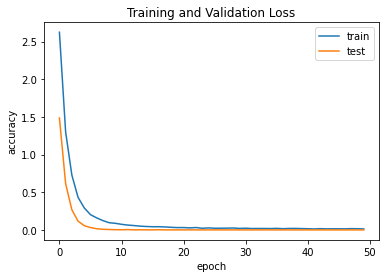

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and Validation Loss")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

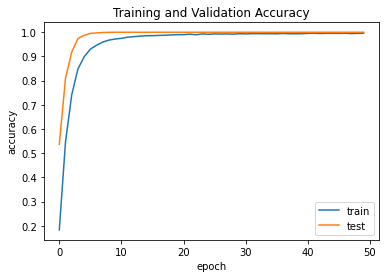

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [23]:
test_labels = test['label']

In [24]:
test.drop('label', axis = 1, inplace = True)

In [25]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [26]:
test_labels = label_binrizer.fit_transform(test_labels)

In [27]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [28]:
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 2ms/step


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(test_labels, y_pred.round())

0.9630507529280535